# Probability Distribution Functions

## Outline

- Quick Recap
- Discrete Probability Distribution and Probability Mass Function
- Continuous Probability Distribution and Probability Density Function
- Wrap up


  
## Recap of Probability Distribution Functions


A probability distribution is a way to represent the possible values and the respective probabilities of a random variable. There are two types of probability distributions: **discrete** and **continuous** probability distributions.

A discrete probability distribution is used when we have a discrete random variable. A continuous probability 
distribution is used when we have a continuous random variable.

The two classes of  distribution are represented by a **probability mass function** (discrete) and by a **probability density function** (continuous).



## Discrete Probability Distribution and Probability Mass Function


### Example 1: Rolling a die

Say we are going to roll a die an infinite number of times and look at the proportion of each of the faces of the die (1, 2, etc). 

We will use **X** to describe the random variable that corresponds to the outcome of the dice roll. Thus the random variable **X = {1,2,3,4,5,6}**.

**The aim of the probability mass function is to describe the probability of each possible value.** 

In our example, it describes the probability to get a 1, a 2 and so on. 

If the die if fair, we can write:

**P(x=1)=P(x=2)=P(x=3)=P(x=4)=P(x=5)=P(x=6)**

Now, how can we calculate the probabilities of each possible value: P(x=1), P(x=2), etc.? Since we have 6 possible outcomes that all have the same probability:

**P(x=1)=P(x=2)=P(x=3)=P(x=4)=P(x=5)=P(x=6)=1/6**

Let's see how to verify this in Python.

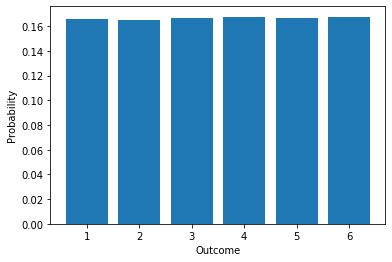

In [1]:
#import our necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#number of times we roll the die
num_throws = 100000
#initializing our outcomes to zero at the beginning
outcomes = np.zeros(num_throws)
#for all the throws..
for i in range(num_throws):
    # let's roll the die
    outcome = np.random.choice(['1', '2', '3', '4', '5', '6'])
    #append the outcome to our array
    outcomes[i] = outcome


#extracting the outcomes and the number of times each one turned up
val, cnt = np.unique(outcomes, return_counts=True)
#computing the probability of each outcome
prop = cnt / len(outcomes)


# Now that we have rolled our die 100,000 times, let's plot the results
plt.bar(val, prop)
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()

Because the die is fair, we notice that each outcome has the same probability of turning up. 

This is also a famous type of distribution called the **Uniform Distribution**.

### Example 2: Calculating the Probability that a Patient will Receive a Prescription in a Year

In this example, we want to visualize the probability distribution function of 200 patients who visit a doctor's office each year. We know that each patient goes to see the doctor three times a year and each of them receive up to three prescriptions in total.

We will define a random variable $X$ as the number of prescriptions each patient received. The values that $X$ will take are $X = \{0,1,2,3\}$.

The table below displays the possible scenarios for a given patient who could receive prescriptions during their appointments and their associated probabilities.

![](visits.png)

We see that 
- 1/8 of the patients received zero prescriptions over a year. 
- 3/8 of the patients received one prescription over a year. 
- 3/8 of the patients received two prescriptions over a year. 
- 1/8 of the patients received three prescriptions over a year. 

In the code cell below, we simulate the number of prescriptions for each of the patients.

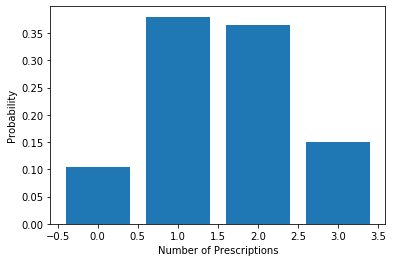

In [2]:
#plotting on a Jupyter Notebook
%matplotlib inline

#importing libraries
import numpy
import scipy.stats
import matplotlib.pyplot as plt

#setting random seed for reproducibility
numpy.random.seed(42)

#we have 200 patients
N = 200
#initialize the random variable that counts the numbers of prescriptions for each of the patients
prescription = numpy.zeros(N, dtype=int)
#simulating the number of prescriptions written for all the patients
for i in range(N):
    #the counter prescription get updated based on whether we get 0, 1, 2, or 3
    prescription[i] = numpy.random.randint(0, 2, 3).sum()

#extracting the values and counting how many times each one occurs
values, counts = numpy.unique(prescription, return_counts=True)
#computing the probability for each result
prop = counts / len(prescription)
#Now that we have simulated the results for all of our patients let's plot the results
plt.bar(values, prop)
plt.ylabel("Probability")
plt.xlabel("Number of Prescriptions")
plt.show()

As expected we obtain a histogram displaying the probabilities associated with this experiment.

We are already a little bit familiar with the distribution we have obtained: its trend follows the shape of a **Binomial Distribution**

In this case, the probability mass function is represented by the probability values 1/8, 3/8, 3/8  and 1/8.

## Continuous Probability Distribution and Probability Density Function

A continuous distribution describes the probabilities of the possible values of a continuous random variable. A continuous random variable is a random variable with an infinite set of possible values. 

**Probability density** describes the relationship between the continuous random variable observations and their probability.

The overall shape of the probability density is referred to as a probability distribution, and the calculation of probabilities for specific outcomes of a random variable is performed by a **probability density function**, or PDF for short.


### Measuring the height of the Rocky Mountains

Let's try to understand how to compute the probability density function of a continuous distribution with an example.

Suppose you are measuring the height of the Rocky Mountains. You find that the shortest mountain is 1734m and that the tallest mountain in 4356m tall. Since the mountain range is extensive, you want to find the probability that any random mountain will be shorter than 3000m.

Interestingly enough, you also find that the distribution of the mountain heights follows a normal distribution with mean 3062 and standard deviation 500, as shown below:

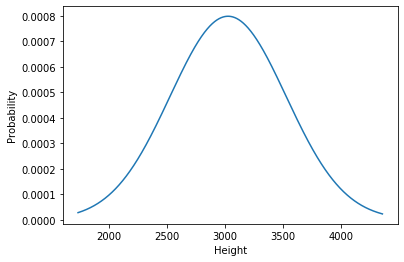

In [3]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between 1734 and 4356m with 1 steps.
x_axis = np.arange(1734, 4356, 1)
#plotting our distribution
plt.plot(x_axis, norm.pdf(x_axis,3026,500))
plt.xlabel("Height")
plt.ylabel("Probability")
plt.show()

If we want to compute the probability that a mountain is shorter than 3000m, we can use the function `cdf()` on our random variable.

47.92643467077197


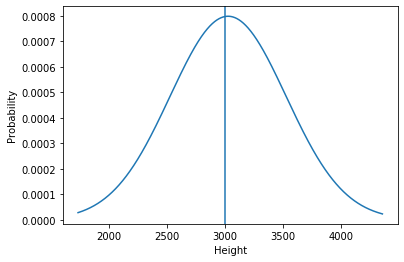

In [4]:
#declare H to be a normal random variable with mean 3062 and standard deviation 500
H = norm(3026, 500) 
#computing the the probability density for P(<3000)
print(H.cdf(3000)*100)

#plotting
plt.plot(x_axis, norm.pdf(x_axis,3026,500))
plt.axvline(3000, 0, 1, label='pyplot vertical line')
plt.xlabel("Height")
plt.ylabel("Probability")
plt.show()

Great, it appears that about 47.9% of the Rocky mountains are shorter than 3000m. Notice also that this probability is represented by the area to the **left** of the vertical line in the graph above.


Of course, if we wanted to compute the probability that a mountain is taller than 3000m, we would need to subtract our result from 1, like so:

In [5]:
#probability that a mountain is higher than 3000m
print((1 - H.cdf(3000))*100)

52.07356532922803


This probability is represented by the area to the **right** of the vertical line in the graph above.

## Wrap up
- Probability Distribution Functions
- Discrete Probability Distribution and Probability Mass Function
- Continuous Probability Distribution and Probability Density Function